In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [10]:
df=pd.read_csv('headbrain.csv')
df


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [11]:
df.shape

(237, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [13]:
df.isnull().any()

Gender                 False
Age Range              False
Head Size(cm^3)        False
Brain Weight(grams)    False
dtype: bool

In [14]:
df.nunique()

Gender                   2
Age Range                2
Head Size(cm^3)        221
Brain Weight(grams)    146
dtype: int64

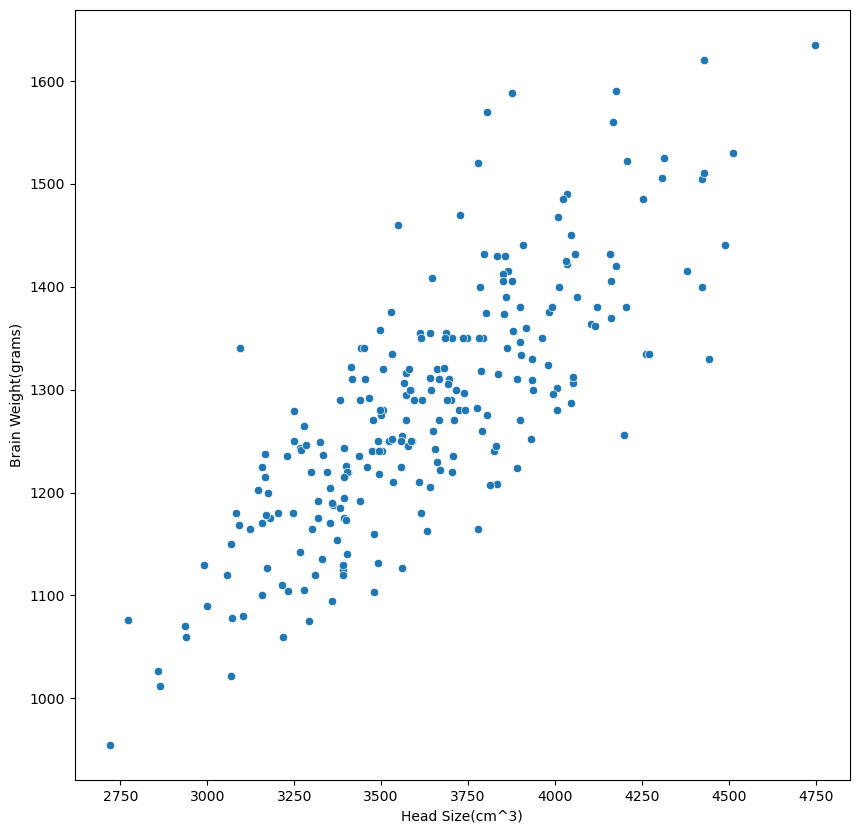

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='Brain Weight(grams)',x='Head Size(cm^3)',data=df)
plt.show()

In [16]:
df=df.values
X = df[:,2]
Y = df[:,3]
X.shape,Y.shape #When working with large datasets, you need to confirm that your features (independent variable X) and target (dependent variable Y) have the correct shape before applying machine learning models.

((237,), (237,))

In [18]:
def LinearRegression(X,Y):
    mean_x=np.mean(X)
    mean_y=np.mean(Y)
    num=0
    den=0
    n = len(X)
    for i in range(n):
        num = num + (X[i] - mean_x)*(Y[i] - mean_y)
        den = den + (X[i] - mean_x)**2
    m = num/den
    c = mean_y - m* mean_x
    return m,c
m,c=LinearRegression(X,Y)
print("Slope (m):", m)
print("Intercept (c):", c)
print(f"Equation of line: y = {m:.2f}x + {c:.2f}")

Slope (m): 0.26342933948939945
Intercept (c): 325.57342104944223
Equation of line: y = 0.26x + 325.57


In [19]:
def Predict(X):
    Y_p = []
    for i in range(len(X)):
        Y_p.append(m*X[i]+c)
    return Y_p
Y_p = Predict(X)
print(Y_p)

[1514.1666008256125, 1310.2722920608173, 1448.0458366137732, 1320.546036300904, 1425.9177720966638, 1269.9676031189392, 1322.6534710168191, 1263.118440292215, 1277.3436246246424, 1374.549050896231, 1232.5606369114446, 1377.4467736306142, 1284.4562167908562, 1434.0840816208351, 1335.034649972821, 1346.6255409103546, 1246.785821243872, 1238.6195117197008, 1140.8872267691336, 1490.9848189505453, 1347.1523995893333, 1391.4085286235525, 1327.6586284671178, 1302.8962705551141, 1576.0724956056215, 1490.721389611056, 1388.7742352286584, 1385.0862244758068, 1235.4583596458278, 1425.390913417685, 1323.1803296957978, 1325.5511937512024, 1406.424000974448, 1421.7029026648333, 1420.9126146463652, 1330.2929218620118, 1254.688701428554, 1312.9065854557114, 1203.8468389071, 1245.468674546425, 1369.2804641064429, 1248.8932559597874, 1462.271020946201, 1327.6586284671178, 1343.2009594969923, 1388.2473765496795, 1460.427015569775, 1159.3272805333913, 1284.7196461303456, 1285.509934148814, 1350.5769810026